In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from skimage.io import imread
from kneed import KneeLocator

import numpy as np
import matplotlib.pyplot as plt

import pickle

In [14]:
## import features and charter list

array_path = r"/home/tschernn/clustering/img_array.pkl"

with open(array_path, 'rb') as file:
    img_array = pickle.load(file)

feature_path = r"/home/tschernn/clustering/features_hog.pkl"

with open(feature_path, 'rb') as file:
    data = pickle.load(file)

charter_path = r"/home/tschernn/clustering/charter_list.pkl"

with open(charter_path, 'rb') as file:
    charters = pickle.load(file)

data.shape

(155, 155)

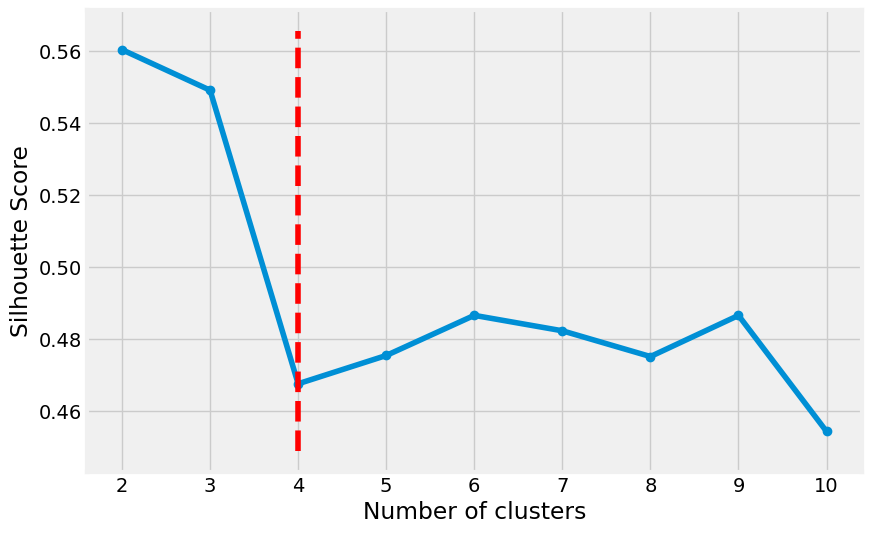

In [9]:
silhouette_scores_agglo_clust = []
plt.figure(figsize=(10,6))
for i in range(2, 11):
    agglo_clust = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
    agglo_clust.fit(data)
    score = silhouette_score(data, agglo_clust.labels_)
    silhouette_scores_agglo_clust.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_scores_agglo_clust, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

ymin, ymax = plt.ylim()
kl = KneeLocator(range(2, 11), silhouette_scores_agglo_clust, curve='convex', direction='decreasing')
plt.vlines(kl.elbow, ymin=ymin, ymax=ymax, colors='red', linestyle='dashed')

plt.show()

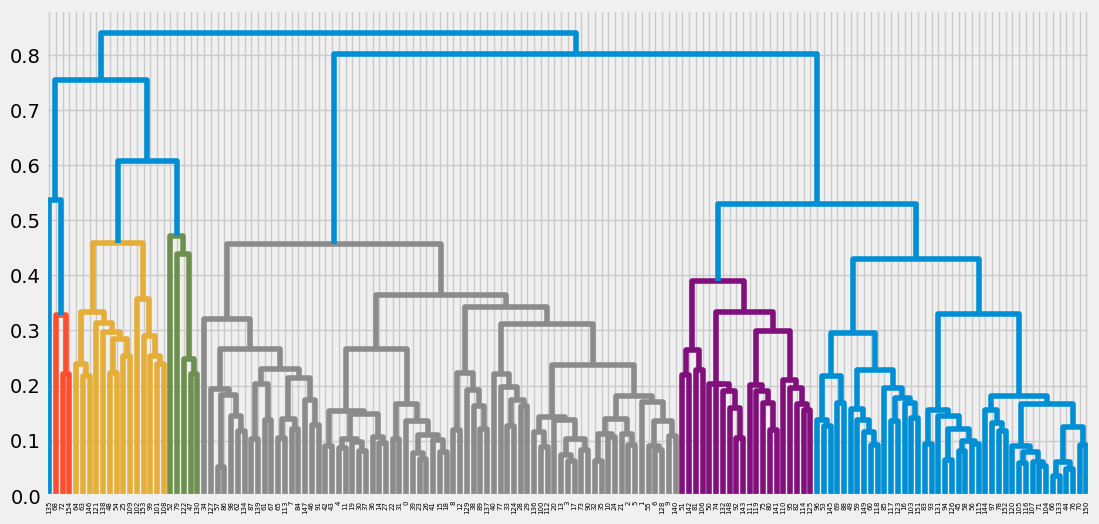

In [21]:
cond_distance_matrix = distance.squareform(data)

Z = linkage(cond_distance_matrix, method='ward')
agglo_clust = AgglomerativeClustering(n_clusters = kl.elbow, metric = 'euclidean', linkage = 'ward')
clusters = agglo_clust.fit_predict(distance_matrix)
plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=0.5, show_leaf_counts=True)
plt.show()

In [29]:
def display_images(image_paths):
    # calculate the number of rows and columns for the subplot grid
    num_images = len(image_paths)
    num_cols = 6
    num_rows = (num_images + num_cols - 1) // num_cols  # calculate rows based on num_cols

    # calculate a dynamic figsize based on your desired aspect ratio
    aspect_ratio = 16 / 9  # adjust this ratio as needed
    fig_width = 12  # adjust this width as needed
    fig_height = fig_width / aspect_ratio * num_rows / 3  # adjust 3 for vertical space per row

    # xreate the subplot grid with dynamic figsize
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

    # loop through the image filenames and display them in subplots
    for i, filename in enumerate(image_paths):
        row = i // num_cols
        col = i % num_cols
        img = imread(filename)
        axs[row, col].imshow(img, cmap=plt.cm.binary)
        axs[row, col].axis('off')

    # hide any empty subplots
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

    plt.tight_layout()  # adjust subplot spacing
    plt.show()

In [30]:
agglo_clust = AgglomerativeClustering(n_clusters = kl.elbow, metric = 'euclidean', linkage = 'ward')
clusters = agglo_clust.fit_predict(data)

/home/tschernn/.local/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [31]:
groups_hierarchical = {}
for charter, cluster in zip(charters, clusters):
    if cluster not in groups_hierarchical.keys():
        groups_hierarchical[cluster] = []
        groups_hierarchical[cluster].append(f'/homedisplay_images(groups_hierarchical[0])/tschernn/clustering/preprocessed_imgs/binarized_imgs/{charter[1]}/{charter[0]}')
    else:
        groups_hierarchical[cluster].append(f'/home/tschernn/clustering/preprocessed_imgs/binarized_imgs/{charter[1]}/{charter[0]}')

FileNotFoundError: No such file: '/homedisplay_images(groups_hierarchical[0])/tschernn/clustering/preprocessed_imgs/binarized_imgs/writable_area_notar/d76cd762eb569bc4168baf59cc6eb54f.jpg'

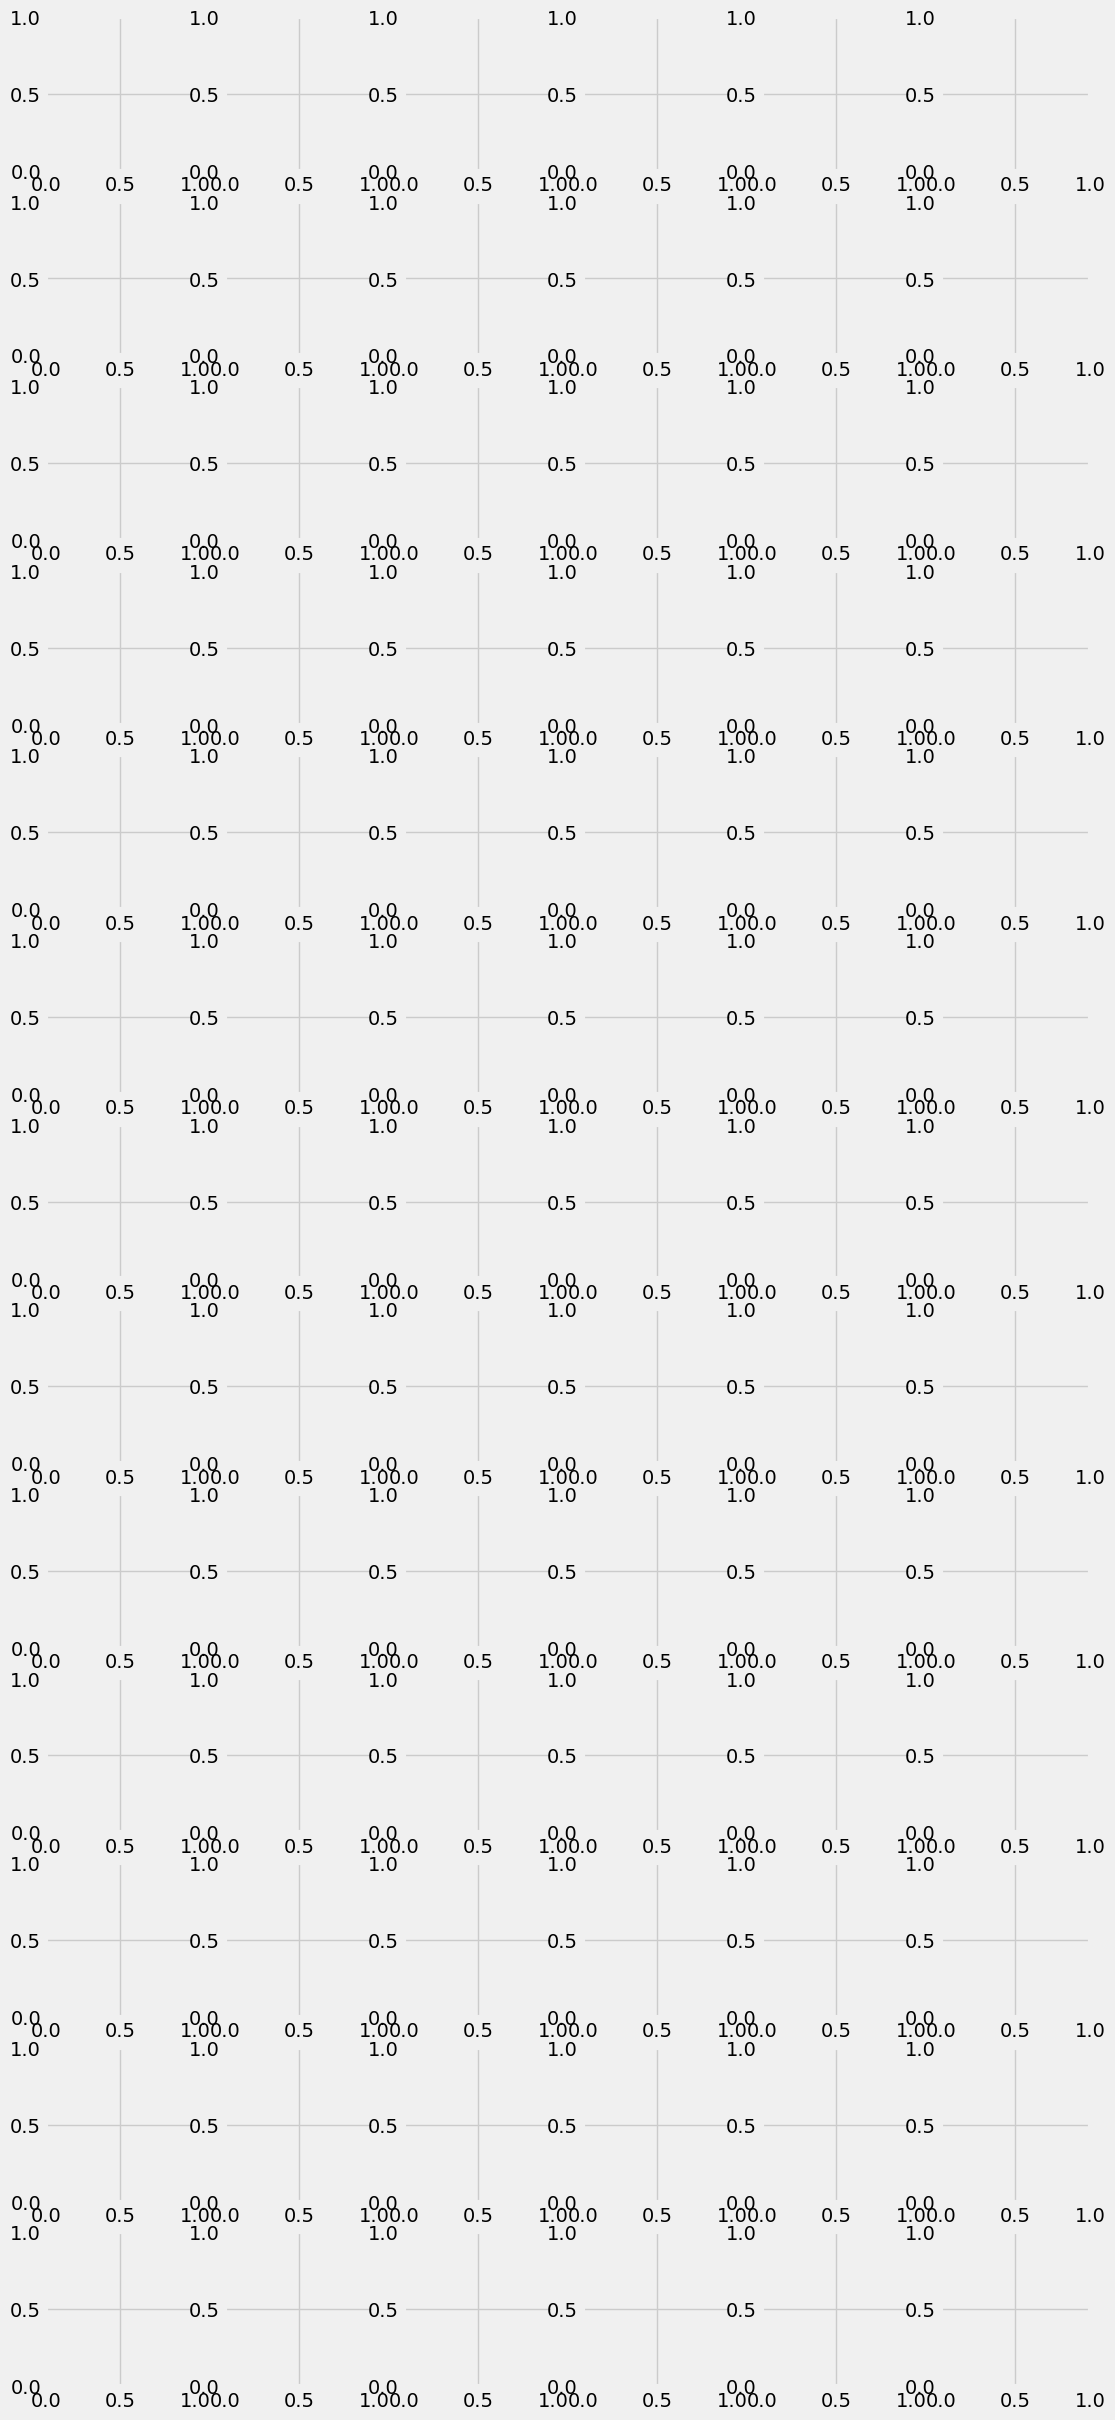

In [34]:
display_images(groups_hierarchical[0])

In [18]:
agglo_clust_labels = agglo_clust.labels_
print("List of cluster labels: " + str(np.unique(agglo_clust_labels)))

List of cluster labels: [0 1 2 3 4 5 6 7 8 9]


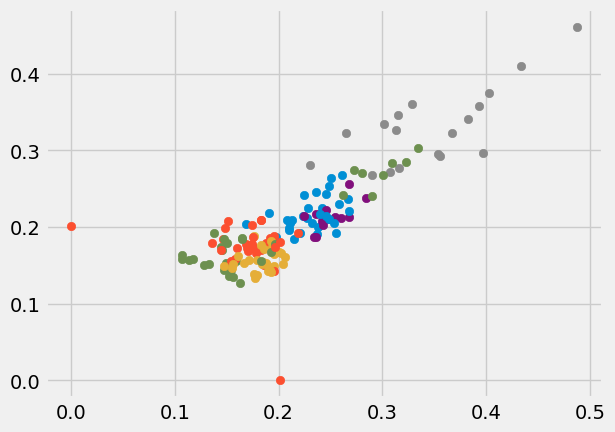

In [19]:
u_lbls = np.unique(agglo_clust_labels) # unique labels

# plotting the results
for i in u_lbls:
    cluster_i = data[agglo_clust_labels == i]
    plt.scatter(cluster_i[:,0], cluster_i[:,1], label = i)
plt.show()